In [1]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
from scipy import stats

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Read dataset
df = pd.read_csv(r"online_shoppers_intention.csv")

# Chek the dataset size
print (f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 12330 rows and 18 columns


In [3]:
# Overview of datatype and missing column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [5]:
# Function to check for the percentage of missing value of each column
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple.
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [6]:
# Check dataset missing percentage
missing_percentage(df)

,Total,Percent


From the initial check, there is no missing value in our dataset.

## Data visualization
### Predefined methods

In [7]:
# function to create scatter plot with regression line
def customized_regplot(y, x, title):
    ## Sizing the plot and setting style
    style.use('fivethirtyeight')
    plt.figure(figsize=(12, 8))

    ## Plotting target variable with predictor variable(OverallQual)
    sns.regplot(y = y, x = x)
    plt.title(title)

In [8]:
# function to create distribution plot
def customized_displot(x, title):
    ## Sizing the plot and setting style
    style.use('fivethirtyeight')
    plt.figure(figsize=(12, 8))

    ## Plotting distribution using histplot
    sns.histplot(x=x, kde=False)
    plt.title(title)
    plt.show()

In [9]:
# function to create scatter plot with regression line
def customized_regplot(y, x, title):
    ## Sizing the plot and setting style
    style.use('fivethirtyeight')
    plt.figure(figsize=(12, 8))

    ## Plotting target variable with predictor variable(OverallQual)
    sns.regplot(y = y, x = x)
    plt.title(title)

In [10]:
# Function to create histogram, QQ plot, and box plot for a specific column
def plotting_3_chart(df, feature, plot_title="Feature Analysis"):
    """
    Creates a histogram, QQ plot, and box plot for a specified column in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        feature (str): The column name for analysis.
        plot_title (str): The title of the entire plot.
    """

    # Set a style
    plt.style.use('fivethirtyeight')

    # Create a customized chart and set the figure size
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    fig.suptitle(plot_title, fontsize=16, fontweight='bold')  # Set the main plot title

    # Create a grid of 3 columns and 3 rows
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title
    ax1.set_title('Distribution')
    # Plot the histogram
    sns.histplot(df.loc[:, feature], stat='density', ax=ax1, kde=True)

    # Customizing the QQ plot
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title
    ax2.set_title('QQ Plot')
    # Plotting the QQ plot
    stats.probplot(df.loc[:, feature], plot=ax2)

    # Customizing the box plot
    ax3 = fig.add_subplot(grid[:, 2])
    # Set the title
    ax3.set_title('Box Plot')
    # Plotting the box plot
    sns.boxplot(y=df.loc[:, feature], ax=ax3)

    # Display the plot
    plt.show()

### Administrative

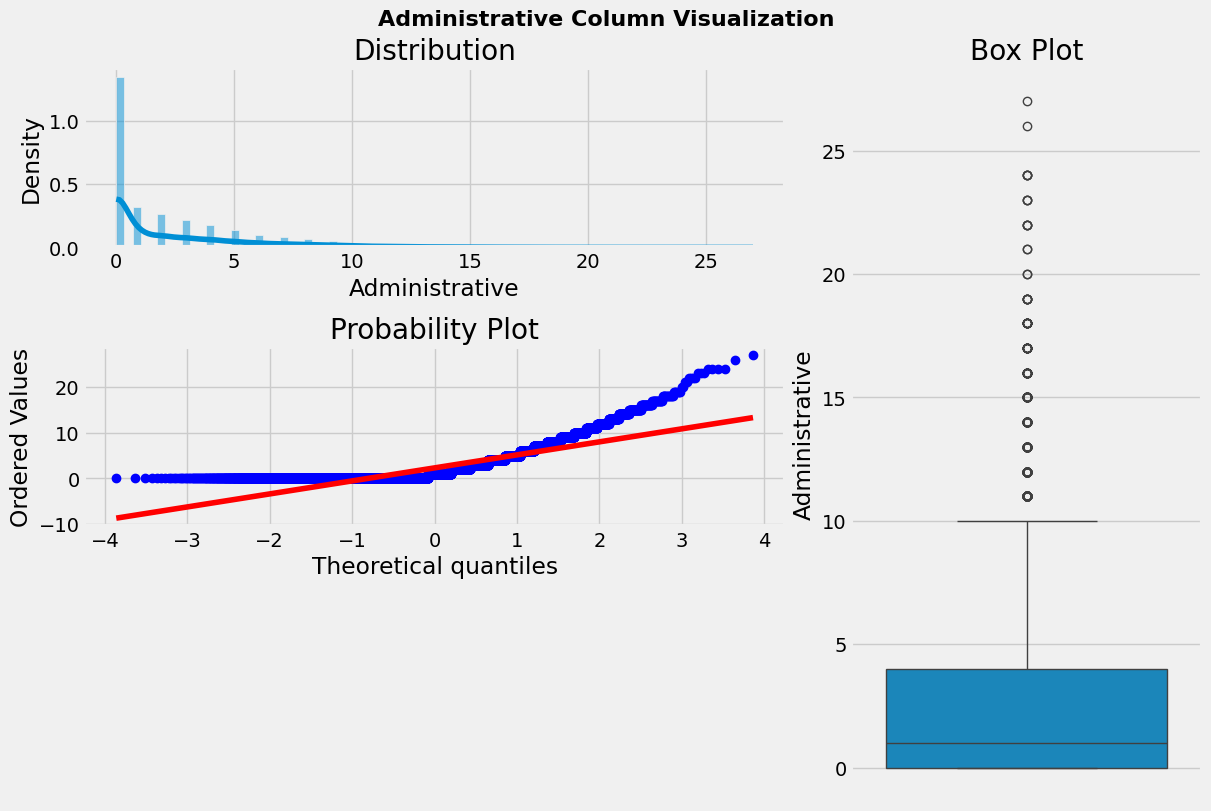

In [11]:
# use plotting_3_chart function to visualize Administrative
plotting_3_chart(df, "Administrative", plot_title="Administrative Column Visualization")

### Transform feature to normal distribution

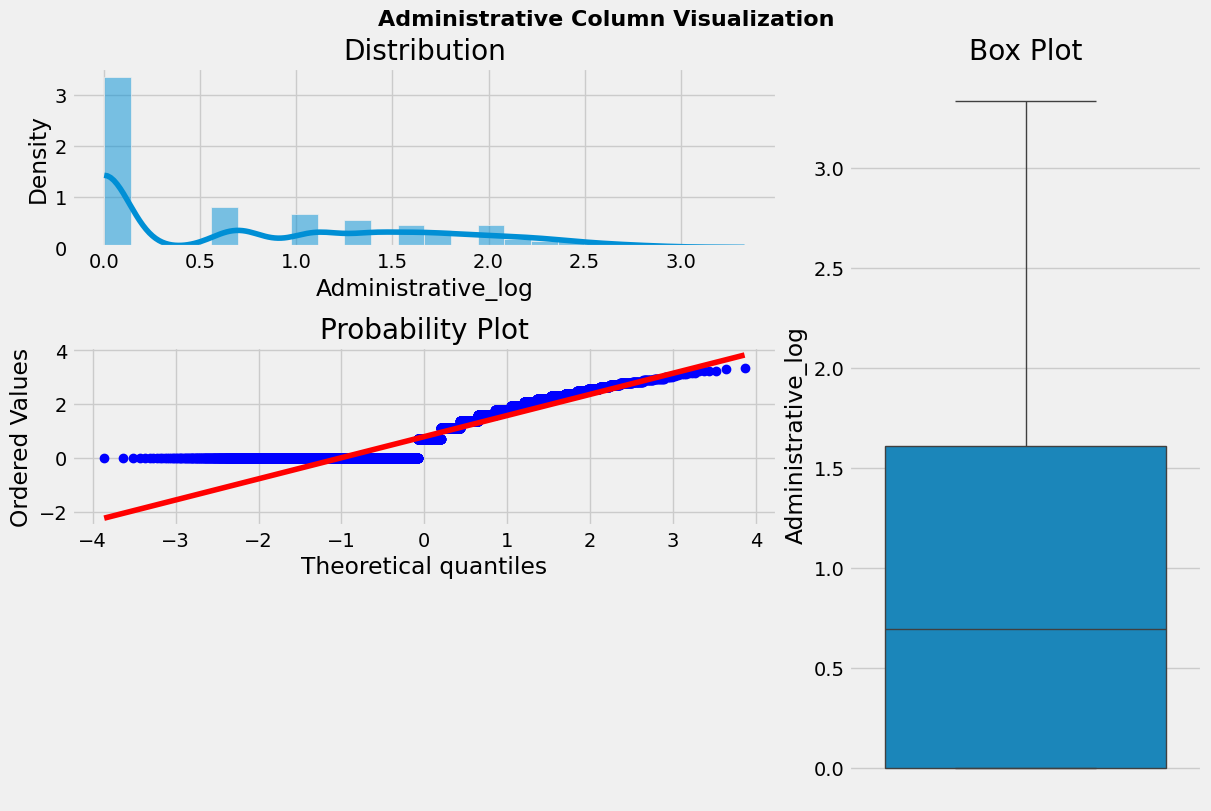

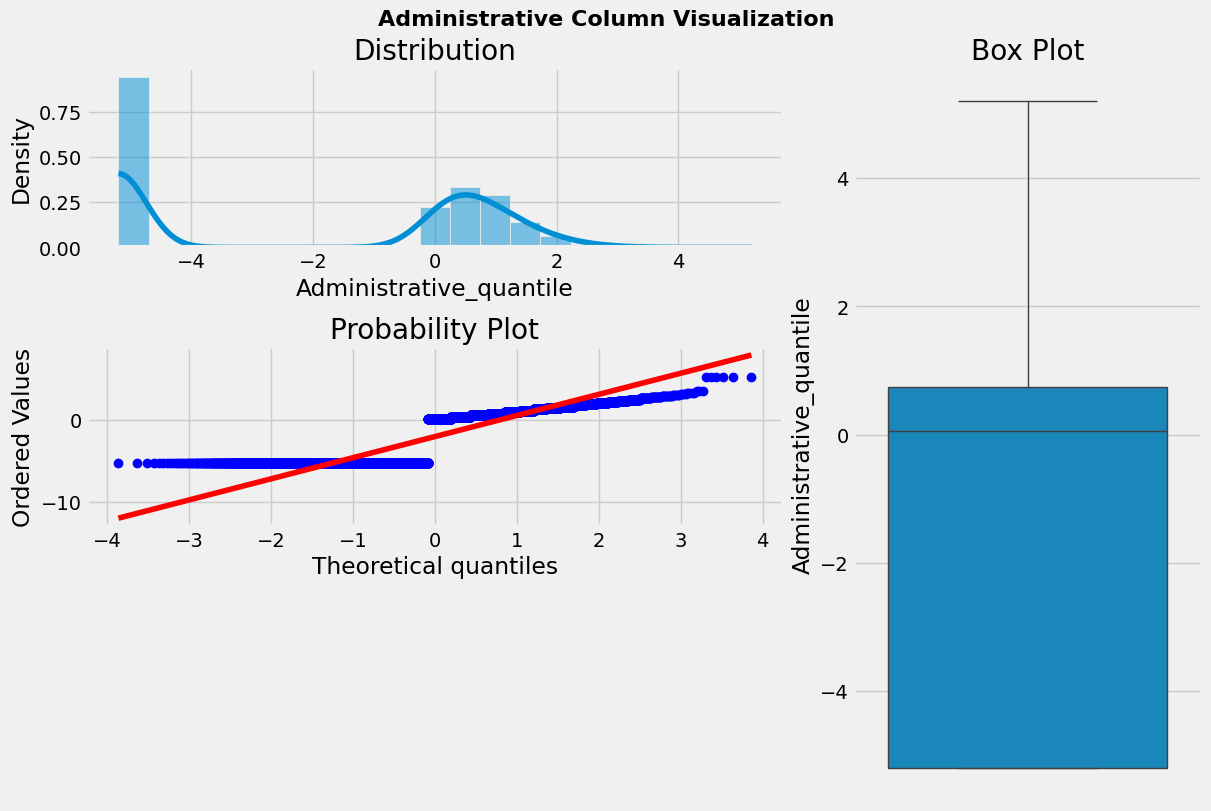

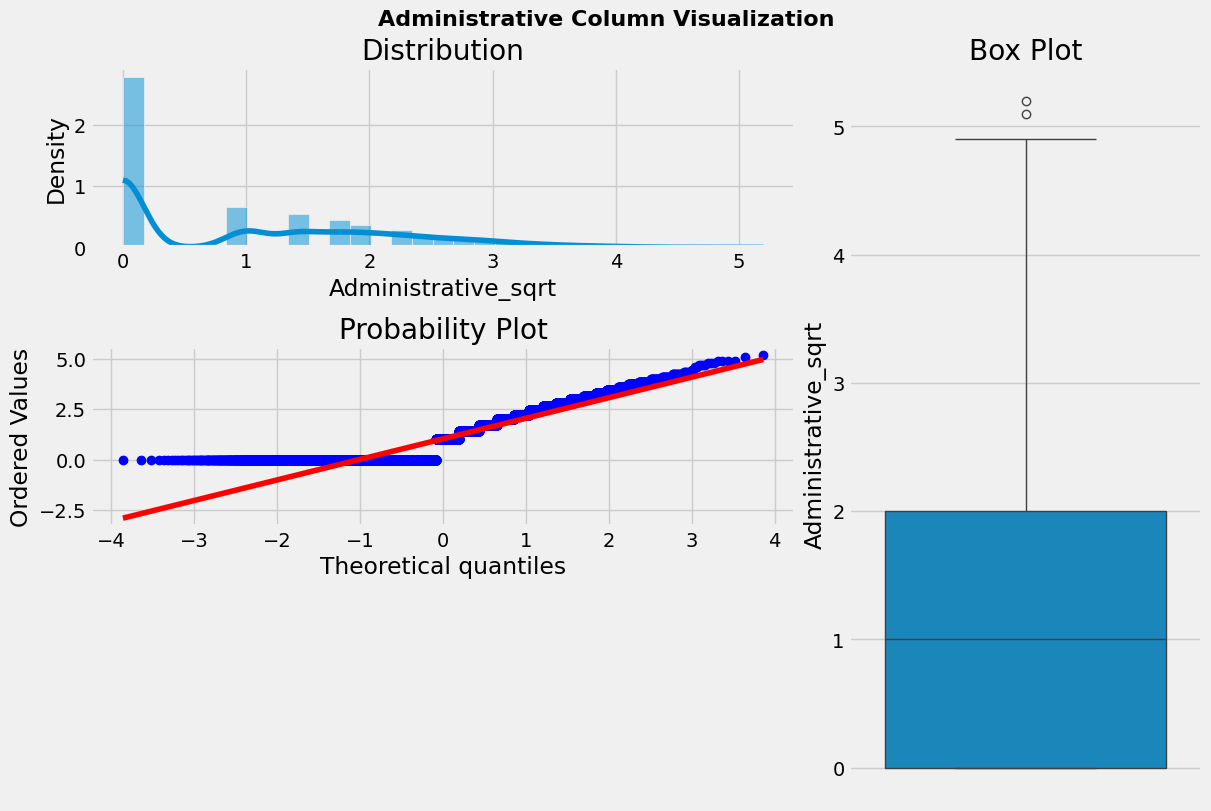

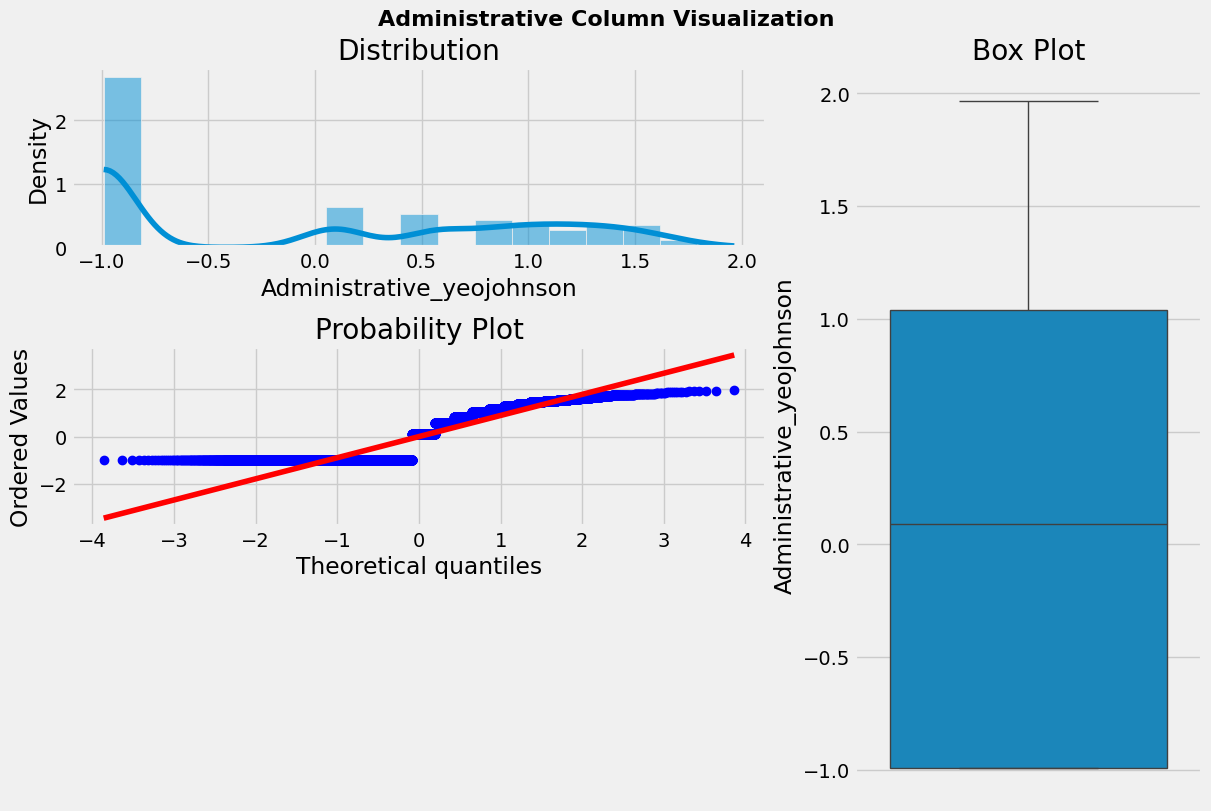

In [14]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from scipy import stats

# Quantile transformation
qt = QuantileTransformer(output_distribution='normal')
df['Administrative_quantile'] = qt.fit_transform(df[['Administrative']])

# Log transformation
df['Administrative_log'] = np.log(df['Administrative'] + 1)

# Square root transformation
df['Administrative_sqrt'] = np.sqrt(df['Administrative'])


# Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df['Administrative_yeojohnson'] = pt.fit_transform(df[['Administrative']])

# Plotting the transformed features
plotting_3_chart(df, "Administrative_log", plot_title="Administrative Column Visualization")
plotting_3_chart(df, "Administrative_quantile", plot_title="Administrative Column Visualization")
plotting_3_chart(df, "Administrative_sqrt", plot_title="Administrative Column Visualization")
plotting_3_chart(df, "Administrative_yeojohnson", plot_title="Administrative Column Visualization")

Distribution:
- The plot clearly illustrates the heavy right skew pattern.
- It is dominated by the value of 0, indicating that most sessions involve visiting few or no administrative pages

QQ Plot:
- The points deviate significantly from the line, confirming the non-normal distribution of this feature.

Box Plot:
- Some outliers appear above the whisker, which demonstrates some sessions with higher administrative page visits than normal

### Administrative_Duration

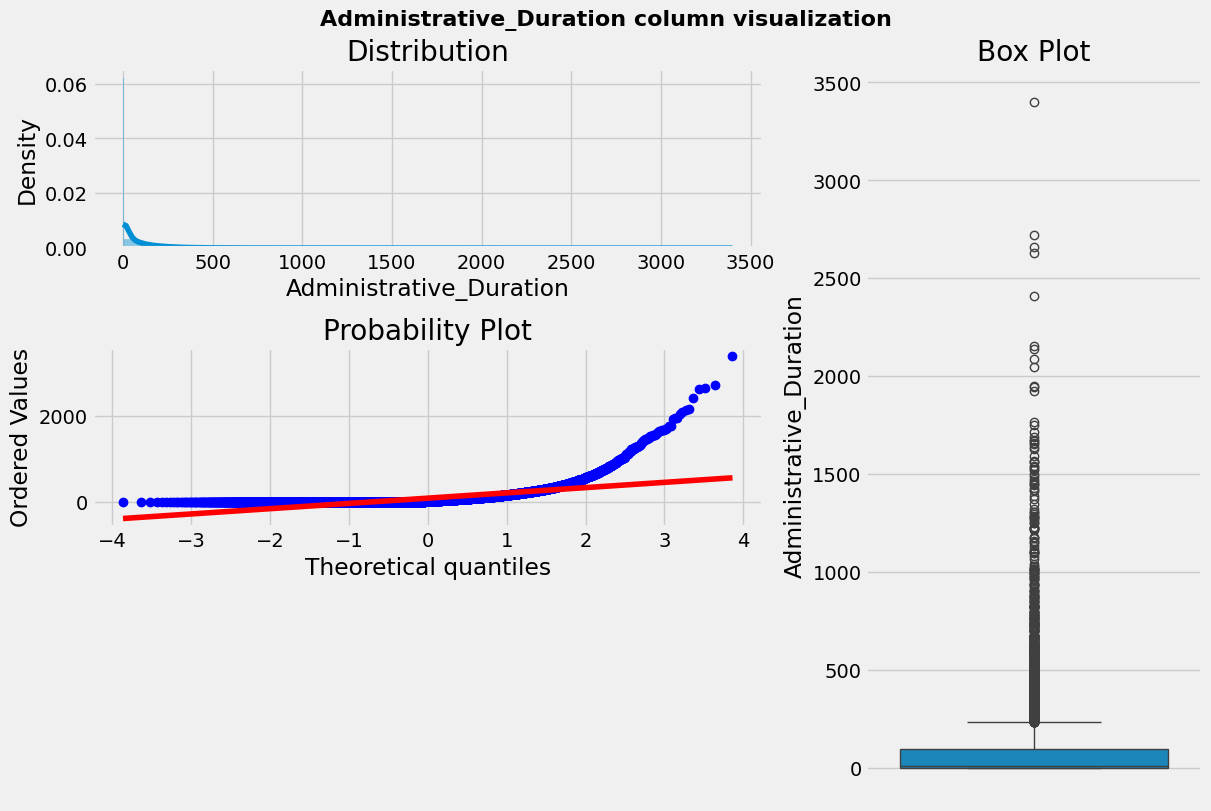

In [32]:
# use plotting_3_chart function to visualize Administrative_Duration
plotting_3_chart(df, "Administrative_Duration", plot_title="Administrative_Duration Column Visualization")

Distribution:
- Similarly, this plot also contain a heavy right skew pattern.
- The primary value is 0, indicating the lack of attention of each session to administrative pages - supporting the observation in the "Administrative" feature.
- Some session have a longer access duration, which contribute to a long tail on the right

QQ Plot:
- The points also deviate substaintially from the line, particularly in the upper tail, showing the highly skewed distribution.

Box Plot:
- There are numerous outliers with higher durations than the majority.

### Informational

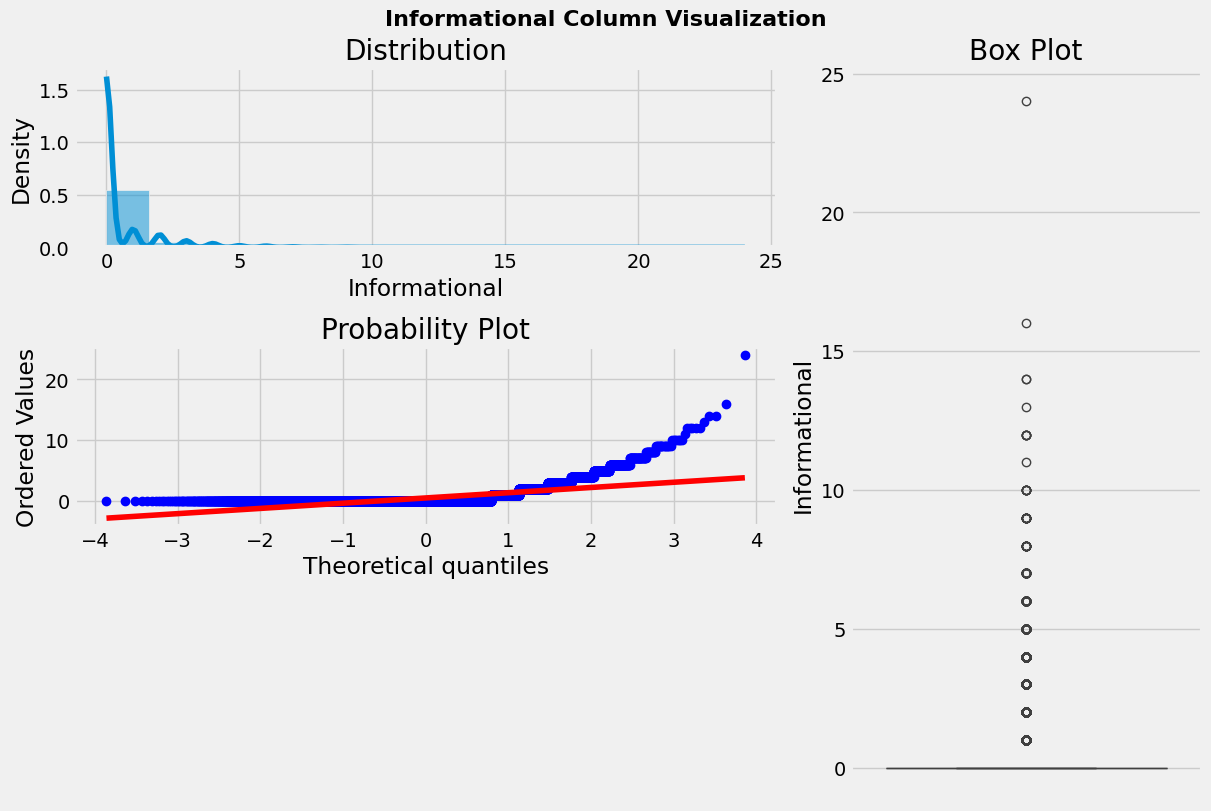

In [33]:
# use plotting_3_chart function to visualize Informational
plotting_3_chart(df, "Informational", plot_title="Informational Column Visualization")

Distribution:
- This is a heavy right skew plot.
- The majority of value is 0, which indicates a lack of attention from visitor to these type of page.

QQ Plot:
- Most points deviate from the diagonal line, especially in the upper tail, indicating a non-normal distribution

Box Plot:
- The box plot reveals numerous outliers, suggesting that some sessions involve significantly higher numbers of informational page visits than others.
- With the extremely narrow IQR, most of data points in this feature is clustered around zero.

### Informational_Duration

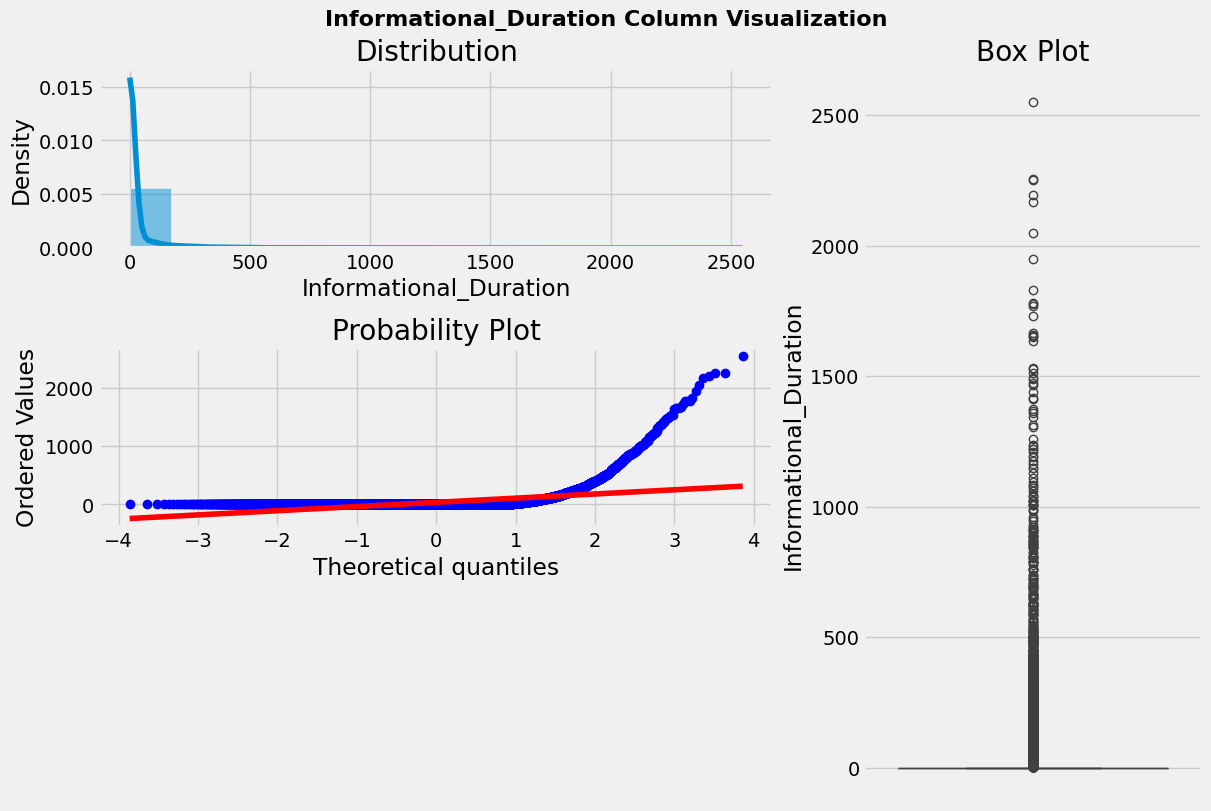

In [35]:
# use plotting_3_chart function to visualize Informational_Duration
plotting_3_chart(df, "Informational_Duration", plot_title="Informational_Duration Column Visualization")

Distribution:
- It is clear that this plot align well with the above plot of Informational feature.
- This highly right skew plot demonstrates little to no time spent on informational pages in most sessions.

QQ Plot:
- The data points show significant deviation in the upper tail, illustrating a non-normal distribution

Box Plot:
- The median and IQR are close to zero, emphasizing that most data points represent low or no durations

### ProductRelated

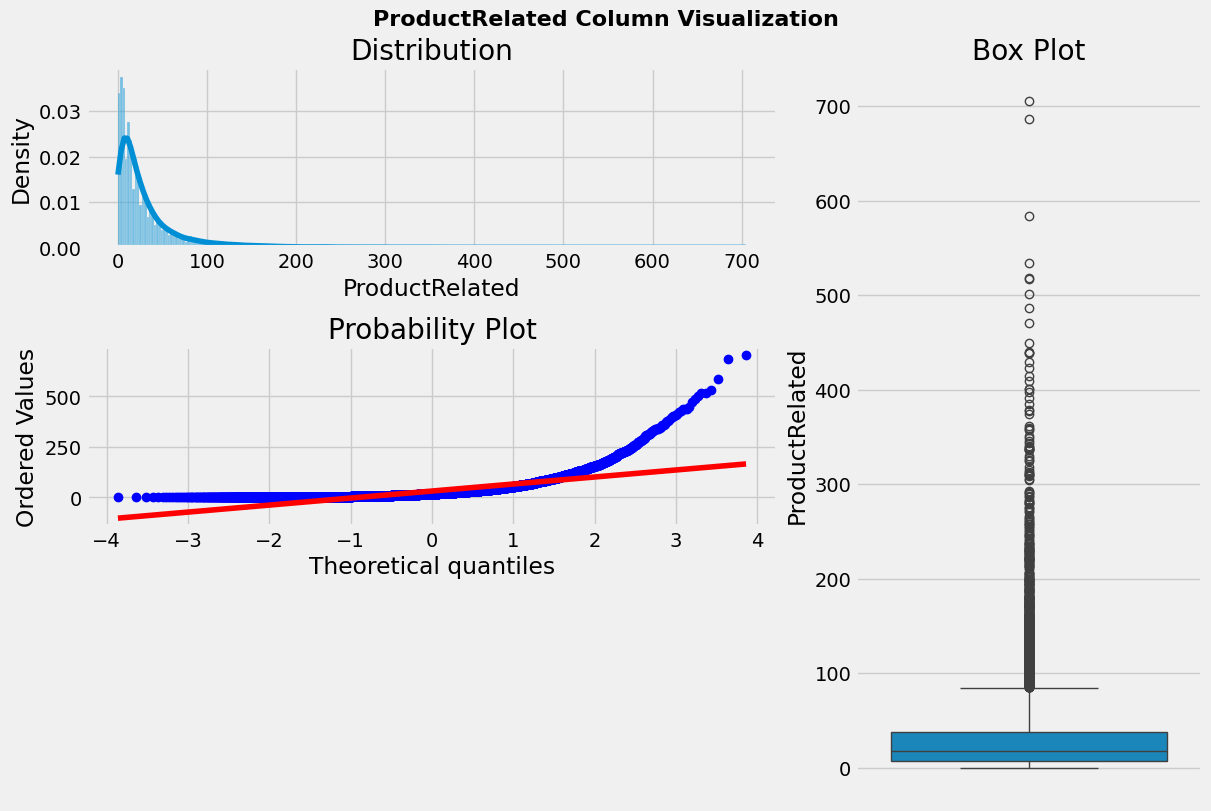

In [36]:
# use plotting_3_chart function to visualize ProductRelated
plotting_3_chart(df, "ProductRelated", plot_title="ProductRelated Column Visualization")

Distribution:
- The data is right skew, but less so compared to the previous, illustrating a wider range of sessions.
- This plot also indicates a higher interest of visitor.
- Another observation is that the distribution is prominent in the lower values but having a longer tail extending toward higher values.

QQ Plot:
- Several data points deviate heavily in the upper tail, illustrating a non-normal distribution.

Box Plot:
- There are several outliers with significant high numbers of product-related page visits compared to the typical range.
- The median and IQR are both larger than previous features, emphasizing the higher interest of visitor in comparison to administrative or informational pages. 

### ProductRelated_Duration

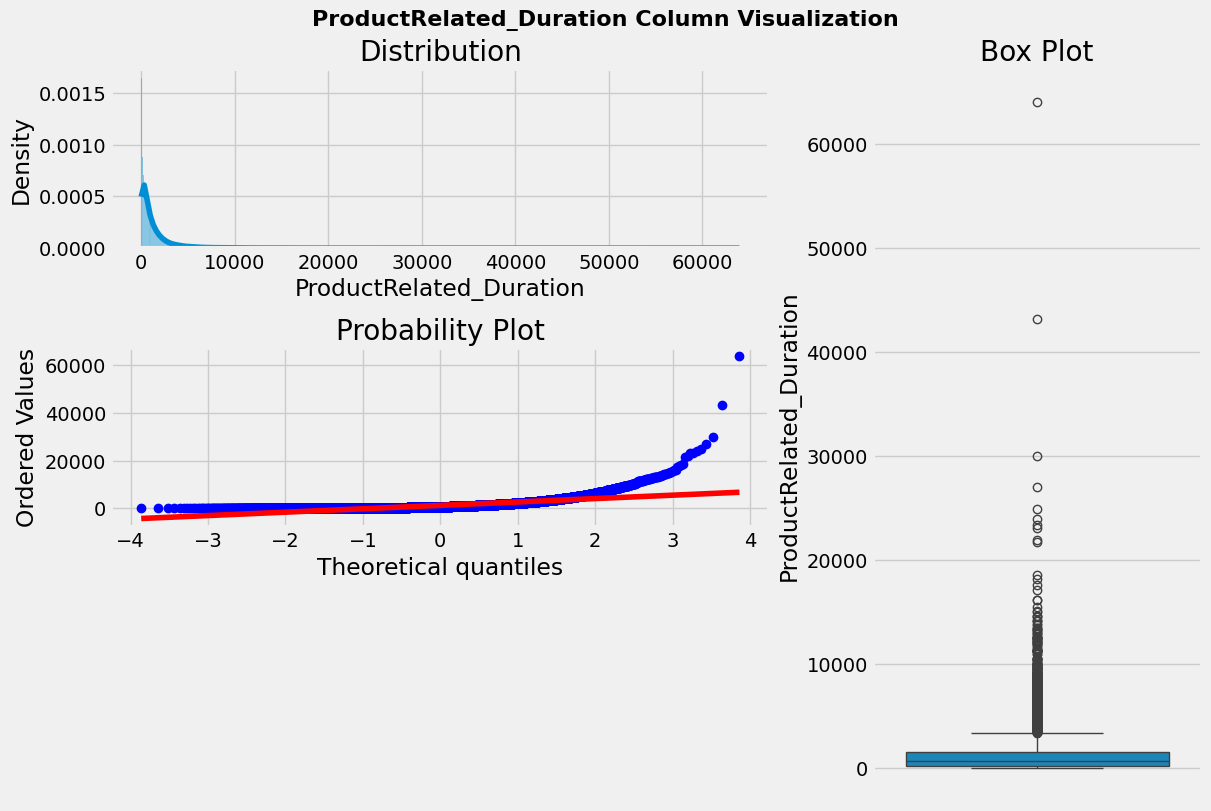

In [37]:
# use plotting_3_chart function to visualize ProductRelated_Duration
plotting_3_chart(df, "ProductRelated_Duration", plot_title="ProductRelated_Duration Column Visualization")

Distribution:
- The data is data is right skew with a long right tail, due to some small number of sessions include significantly longer durations.

QQ Plot:
- Several data points deviate heavily in the upper tail, illustrating a non-normal distribution.

Box Plot:
- There are several extreme outliers, illustrating users who spend an unusually high amount of time.
- The median and IQR are both larger than other duration features, highlighting the better attention of visitor toward product-related pages.

### BounceRates

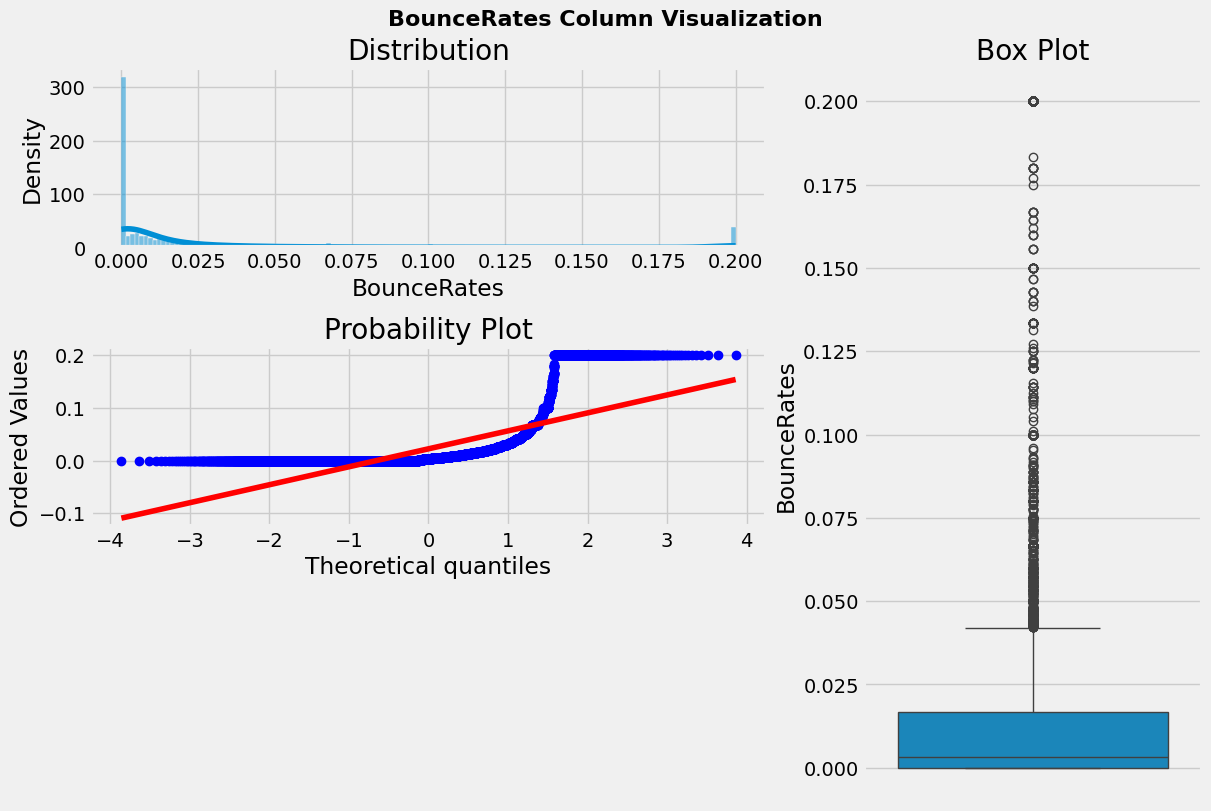

In [38]:
# use plotting_3_chart function to visualize BounceRates
plotting_3_chart(df, "BounceRates", plot_title="BounceRates Column Visualization")

Distribution:
- The data is right-skewed, with the majority of sessions having very low bounce rates, suggesting that in general, users do not leave the site immediately after visiting a single page.
- A small number of sessions exhibit higher bounce rates, which might arise from the user's accidental actions or technical issue.

QQ Plot:
- Almost all the data points deviate deviate from the diagonal line, confirming a non-normal distribution.

Box Plot:
- Outliers in this plot represent sessions with unusually high bounce rates, where users exited the site almost immediately after arriving.
- The median and IQR is small, indicating that most sessions have minimal bounce rates.

### ExitRates

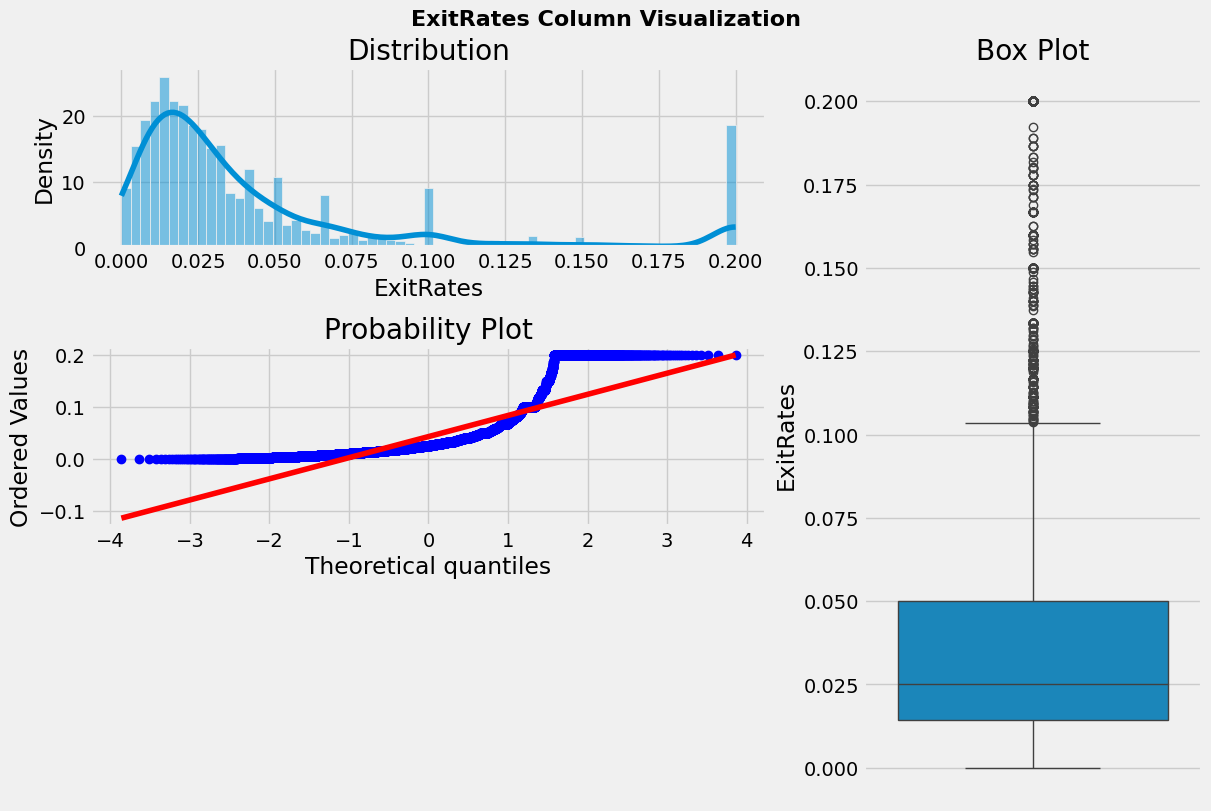

In [39]:
# use plotting_3_chart function to visualize ExitRates
plotting_3_chart(df, "ExitRates", plot_title="ExitRates Column Visualization")

Distribution:
- Most sessions exhibit low exit rates, which illustrates that users tend to navigate through multiple pages before ending their visit in general.

QQ Plot:
- A large number of data points deviate deviate from the diagonal line, confirming a non-normal distribution.

Box Plot:
- The median exit rate is relatively low, consistent with the histogram
- The outliers indicates sessions where exit rates are unusually high, which might due to the lost of engagement of user.

### Page Value

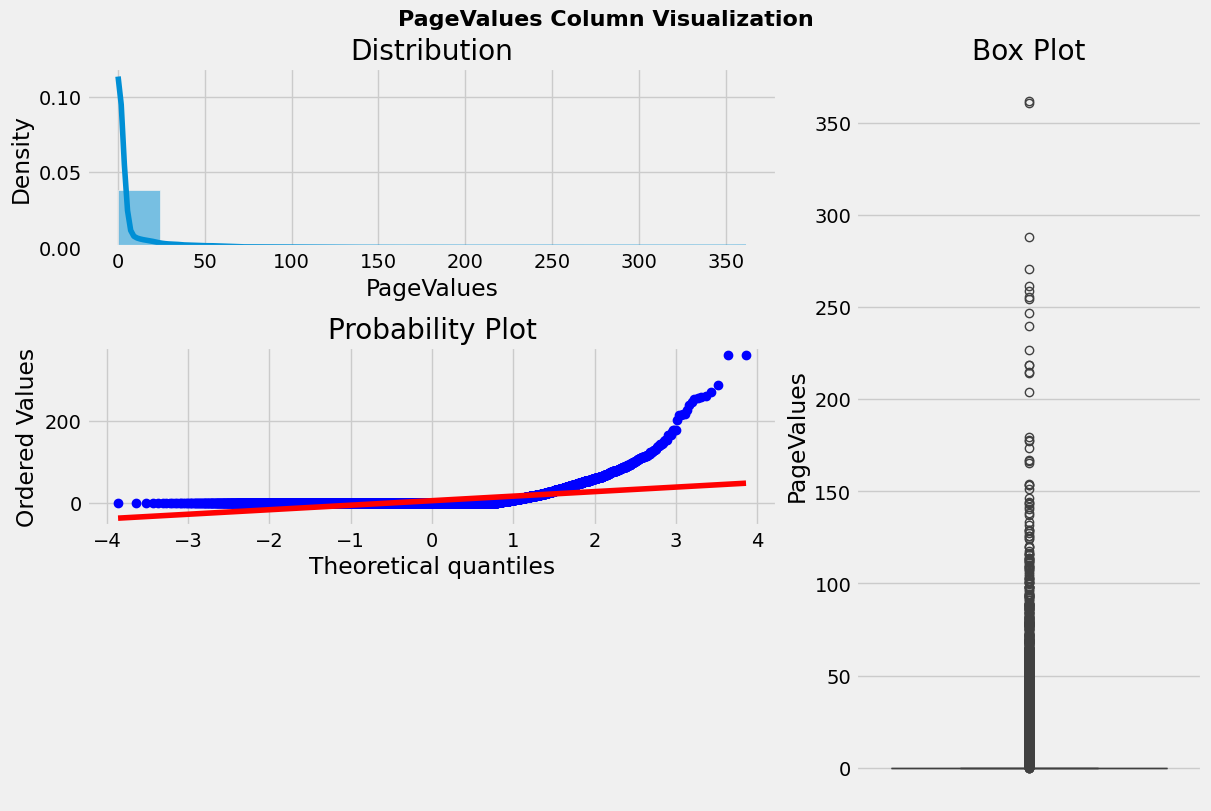

In [40]:
# use plotting_3_chart function to visualize PageValues
plotting_3_chart(df, "PageValues", plot_title="PageValues Column Visualization")

Distribution:
- The distribution shows a right-skewed pattern, with the majority of sessions have a PageValue close to zero.
- However, there exist a smaller number of sessions with higher PageValues, where pages contributed significantly to revenue generation.

QQ Plot:
- Several data points align with the diagonal line, except in the upper tail, illustrating the skewed nature of the distribution.

Box Plot:
- The box plot reveals several outliers where pages had unusually high values.
- These outliers likely correspond to successful transactions or pages that were critical in the customer conversion process.
- In contrast, the median and interquartile range (IQR) are close to zero, showing that most pages contribute minimally or not at all to revenue.

### SpecialDay

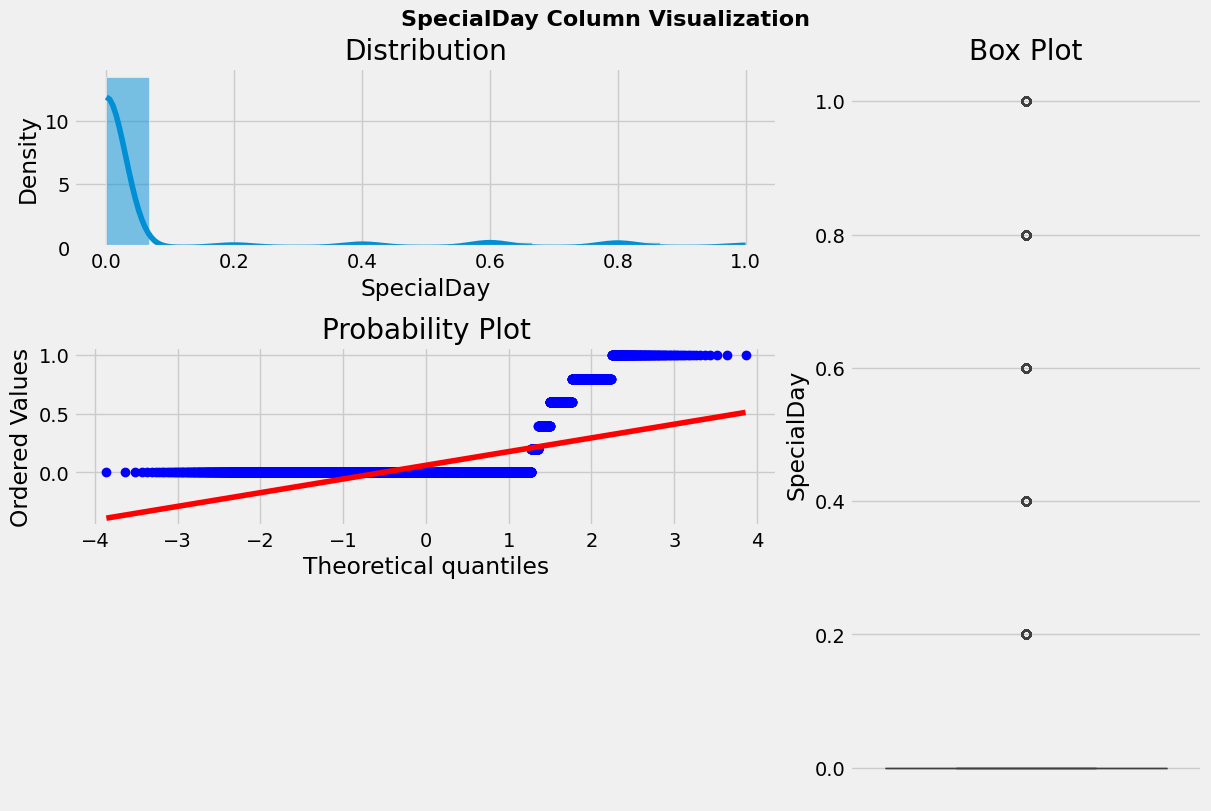

In [41]:
# use plotting_3_chart function to visualize SpecialDay
plotting_3_chart(df, "SpecialDay", plot_title="SpecialDay Column Visualization")

Distribution:
- The histogram shows that most sessions have a SpecialDay value of 0, indicating they occurred far from any special day.

QQ Plot:
- The data points deviate significantly from the diagonal line, confirming that the distribution is not normal.

Box Plot:
- The box plot highlights that most data points lie close to 0.
- Additionally, there are no extreme and unsual outliers due to the feature is constrained between 0 and 1.

### Month

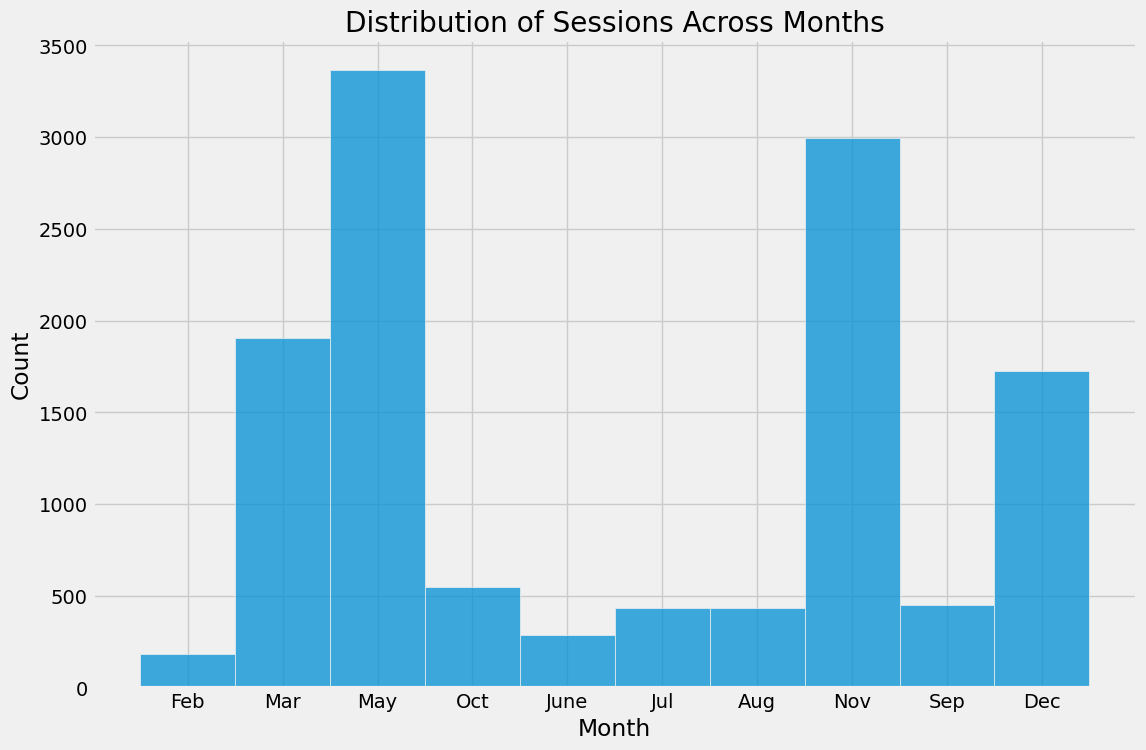

In [43]:
# Visualize the Distribution of Months
customized_displot(df['Month'], title="Distribution of Sessions Across Months")

- Some months have significantly higher session counts than others.
- Months with higher activity might relate with specific shopping events, while months with lower activity might represent periods of reduced interest
- In November and December, special events such as Black Friday, Cyber Monday, Chrismast, and New Year, increase the market demand, resulting in a higher session counts.
- The decent demand in July, August, and September might because of the back to school event, with the particular customer base - education.
- In March and May, the high demand might arise due to the Women's Day and Mother's day, respectively. 

### OperatingSystems

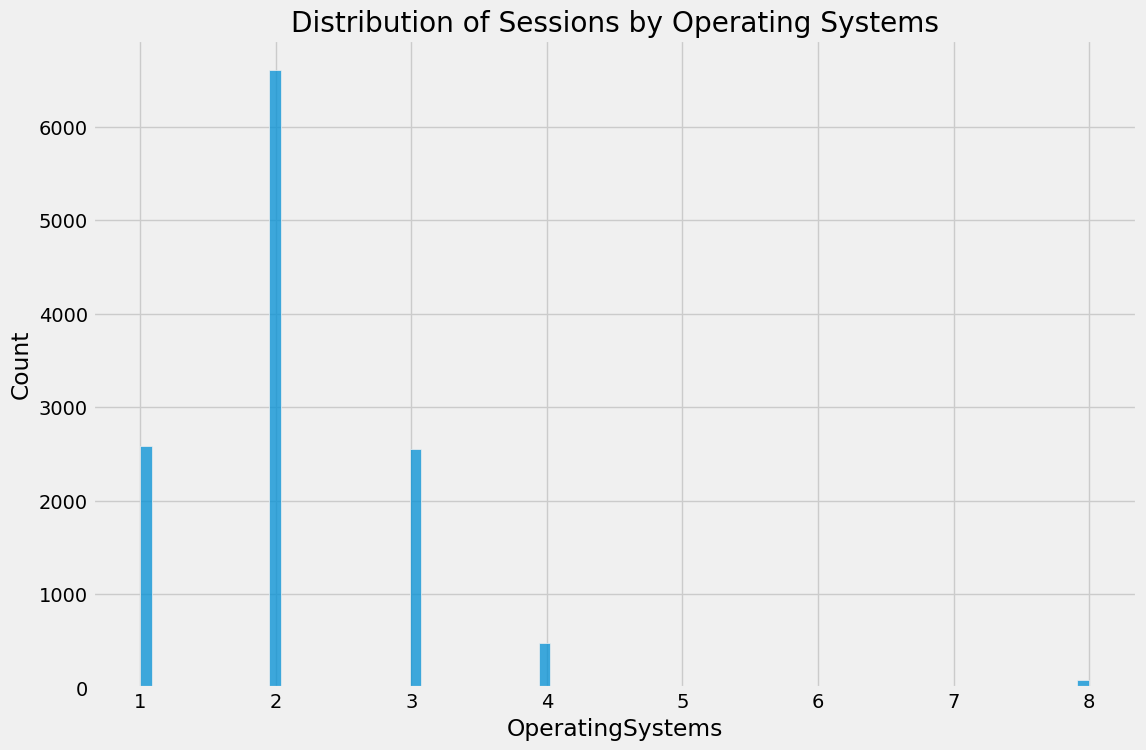

In [44]:
# Visualize the Distribution of Months
customized_displot(df['OperatingSystems'], title="Distribution of Sessions by Operating Systems")


- The most frequently used operating systems could reflect the preferences or demographics of the website's audience.
- From this data, the site can primarily optimize the site UX and compatibility with OS 1, 2, 3, and 4 to ensure the shopping experience of the majority of users. 

### Browser

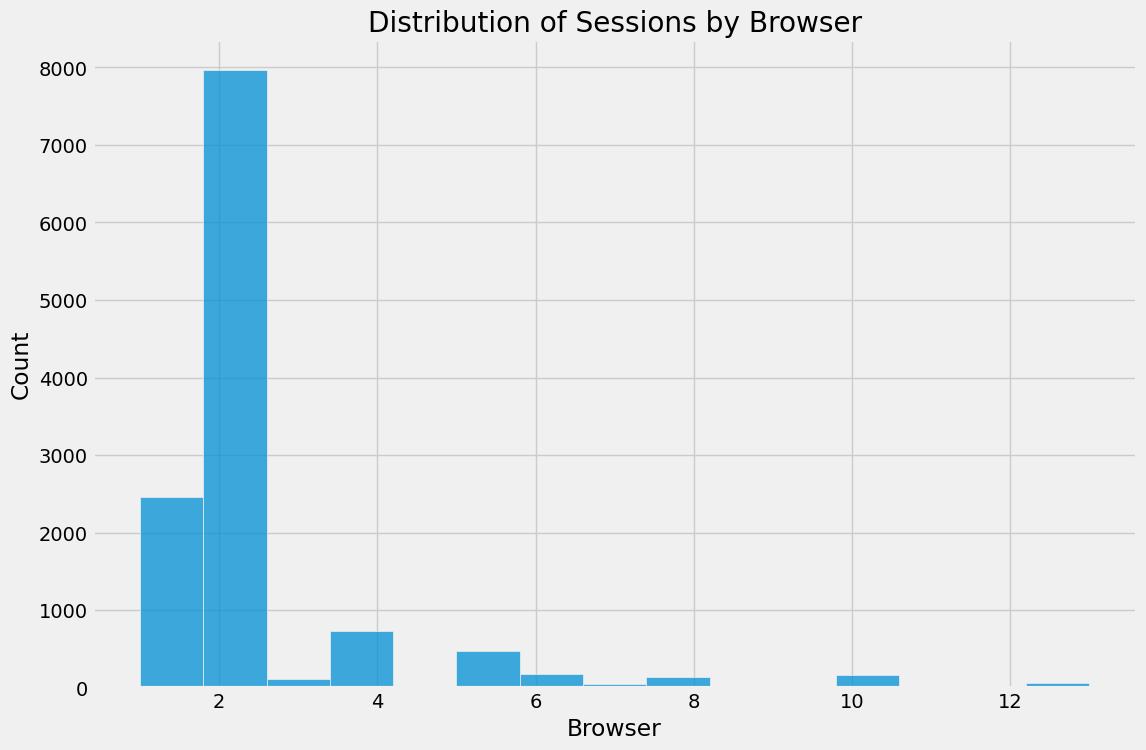

In [45]:
# Visualize the Distribution of Browser
customized_displot(df['Browser'], title="Distribution of Sessions by Browser")

- This plot depicts that the website visitors mainly use a limited number of browsers.
- The site can primarily focus on optimizing with the browser type 1, 2, and 4 to ensure seamless experience of majority of users.

### Region

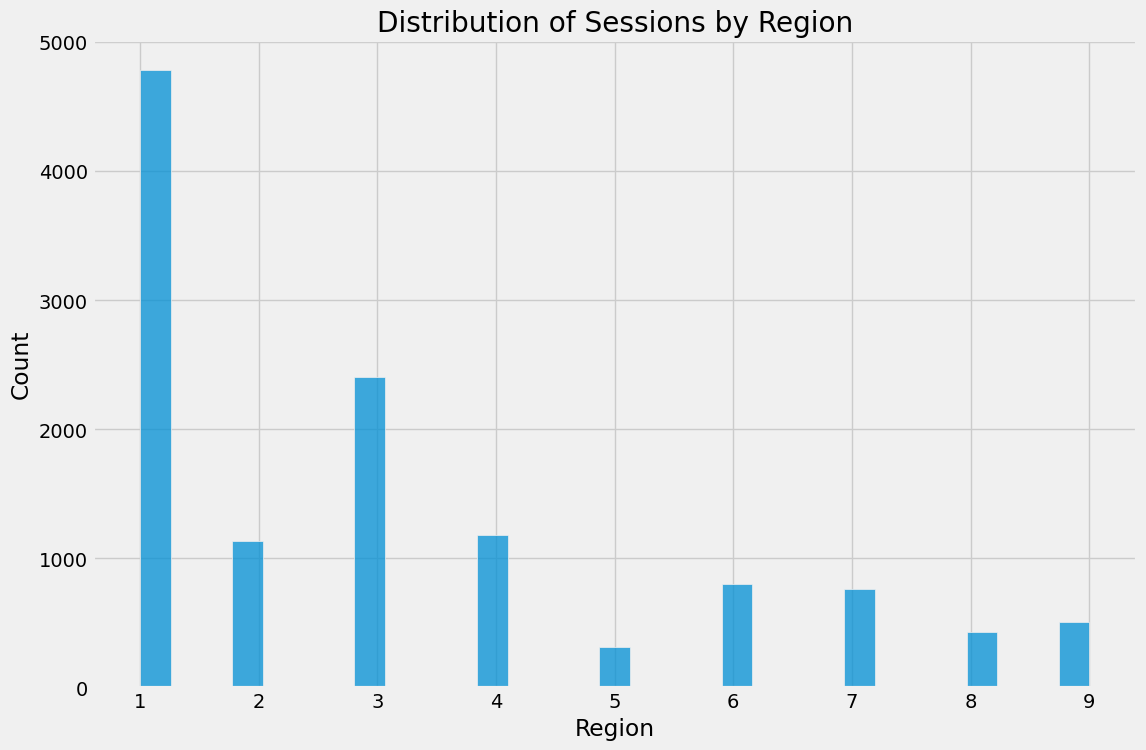

In [46]:
# Visualize the Distribution of Region
customized_displot(df['Region'], title="Distribution of Sessions by Region")

- Certain regions like 1 and 3 contribute more significantly to the session count than others, as indicated by the taller bars.
- For other regions, the number of appearances of each region does not fluctuated much.
- Hence, the site should focus more on regions 1 and 3, where they have a lot of users, while maintaining the consistent access throughout other region.

### TrafficType

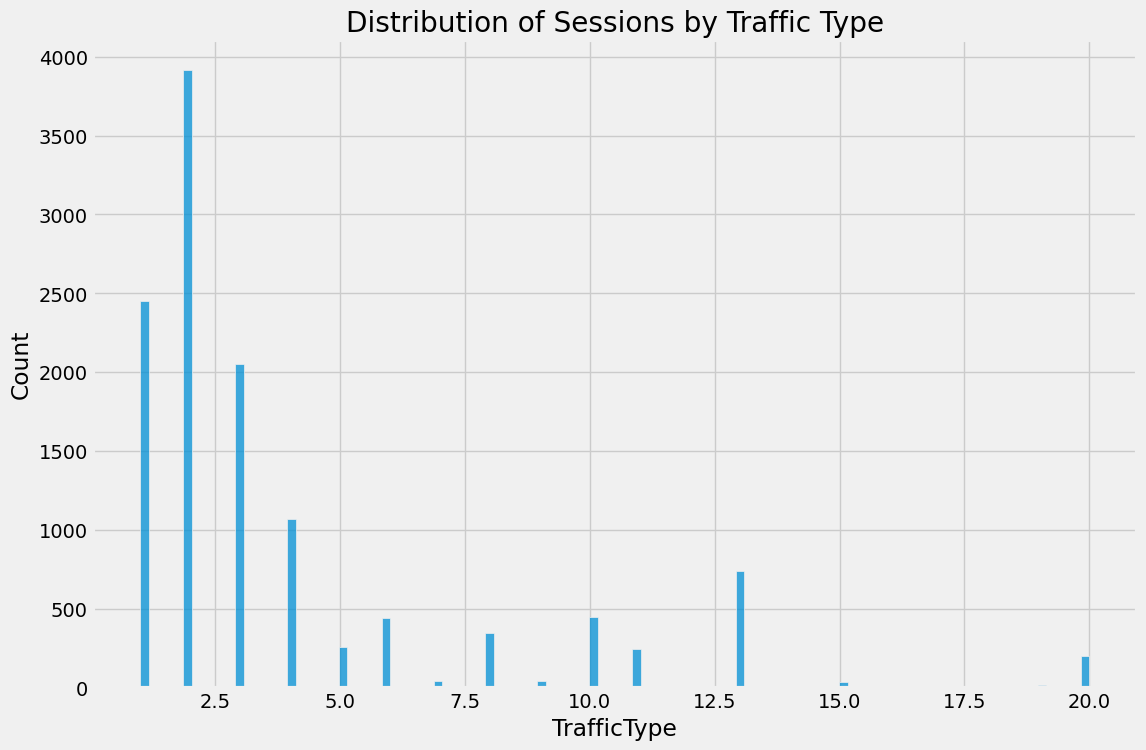

In [47]:
# Visualize the Distribution of TrafficType
customized_displot(df['TrafficType'], title="Distribution of Sessions by Traffic Type")

- Certain traffic types are much more common than others, as illustrated by the tall bars for specific values.
- Furthermore, the majority of sessions come from a limited number of traffic sources.

### VisitorType

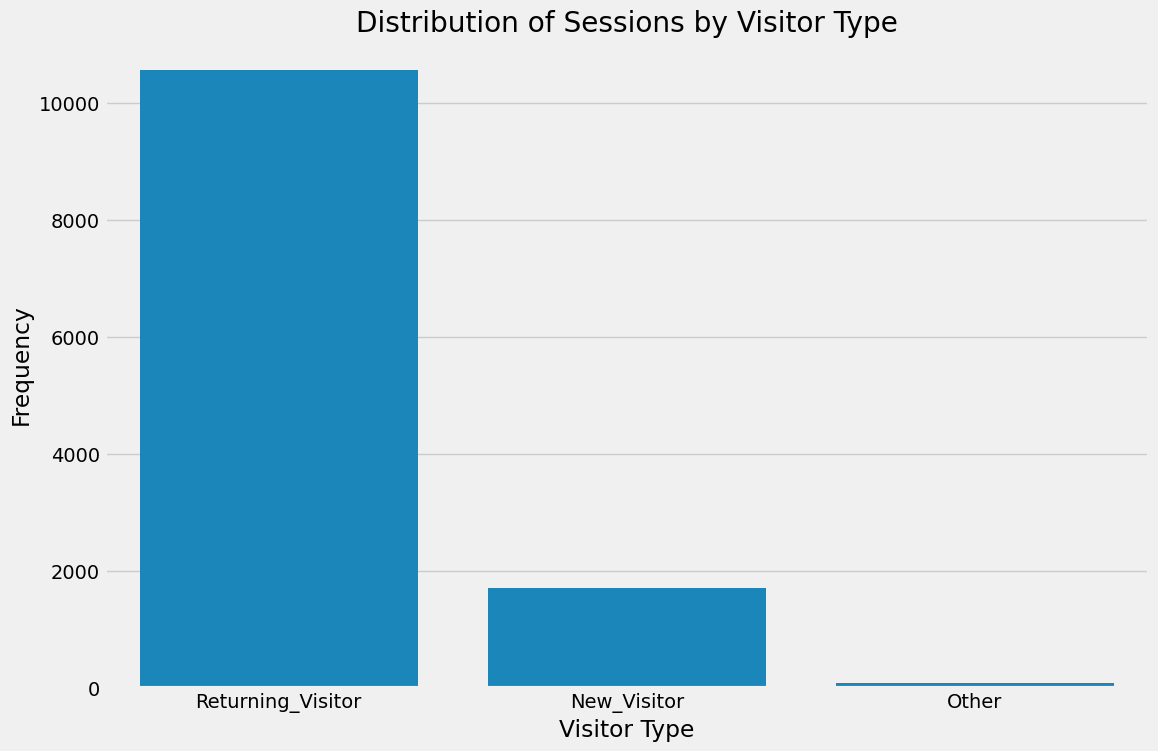

In [55]:
# Visualize the Distribution of VisitorType
plt.figure(figsize=(12, 8))
sns.countplot(x=df['VisitorType'], order=df['VisitorType'].value_counts().index)
plt.title("Distribution of Sessions by Visitor Type")
plt.xlabel("Visitor Type")
plt.ylabel("Frequency")
plt.show()


- The majority of sessions are from "Returning Visitors", emphasizing their importance for this website.
- Furthermore, this statistics also highlights the strong user retention of the site.
- This column also have a pattern of imbalance among different user's types.

### Weekend

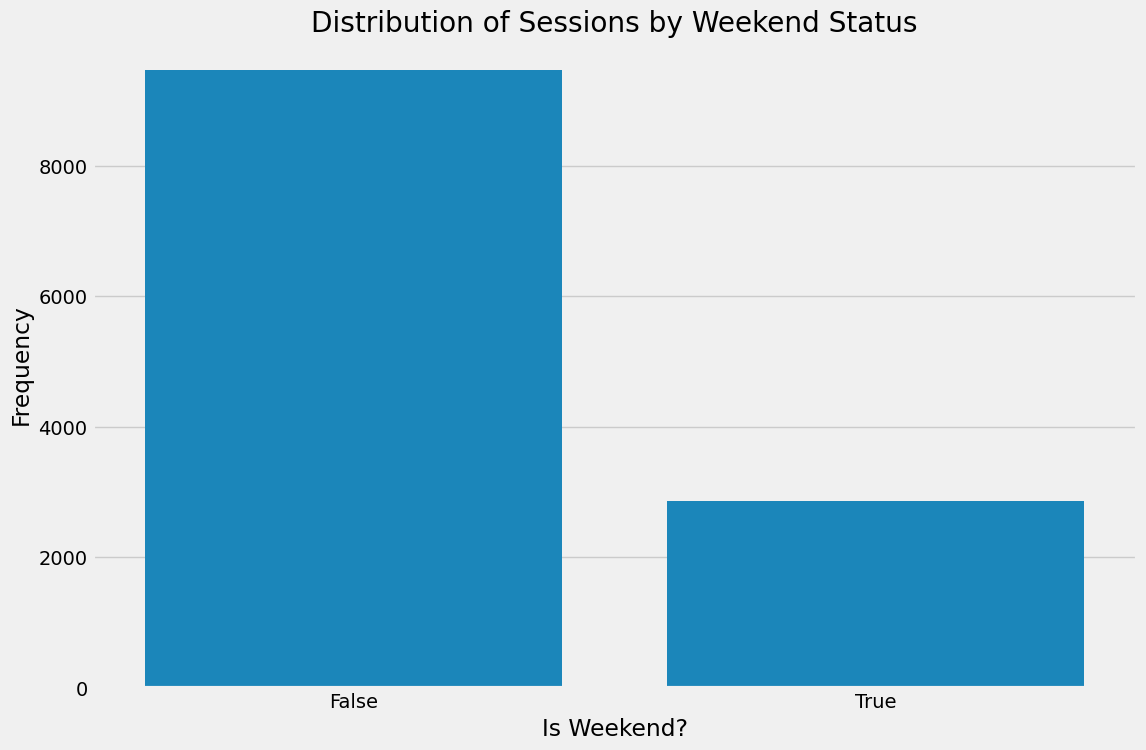

In [53]:
# Visualize the Distribution of Weekend
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Weekend'], order=df['Weekend'].value_counts().index)
plt.title("Distribution of Sessions by Weekend Status")
plt.xlabel("Is Weekend?")
plt.ylabel("Frequency")
plt.show()


- The majority of sessions occur during weekdays

### Revenue

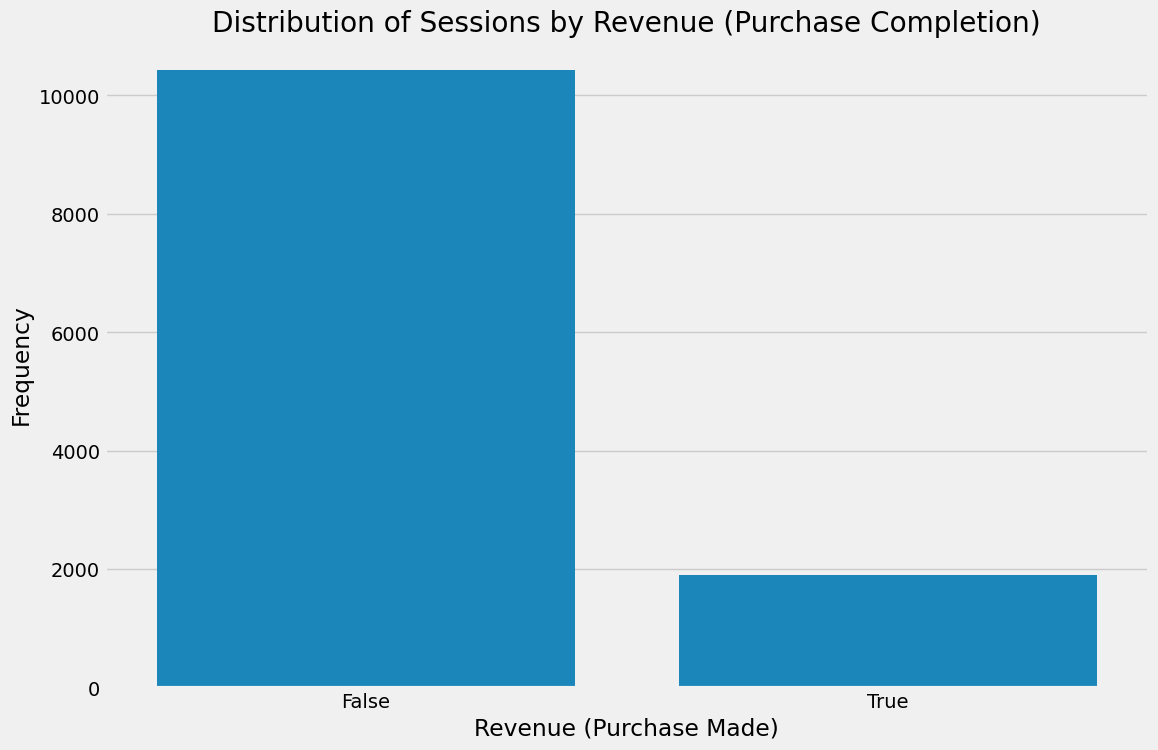

In [54]:
# Visualize the Distribution of Revenue
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Revenue'], order=df['Revenue'].value_counts().index)
plt.title("Distribution of Sessions by Revenue (Purchase Completion)")
plt.xlabel("Revenue (Purchase Made)")
plt.ylabel("Frequency")
plt.show()


- There is a significant imbalance in the dataset, with most sessions resulting in no revenue.
- The website sees far more browsing activity without purchases compared to sessions leading to transactions, which is typical in e-commerce, where conversion rates are often low.

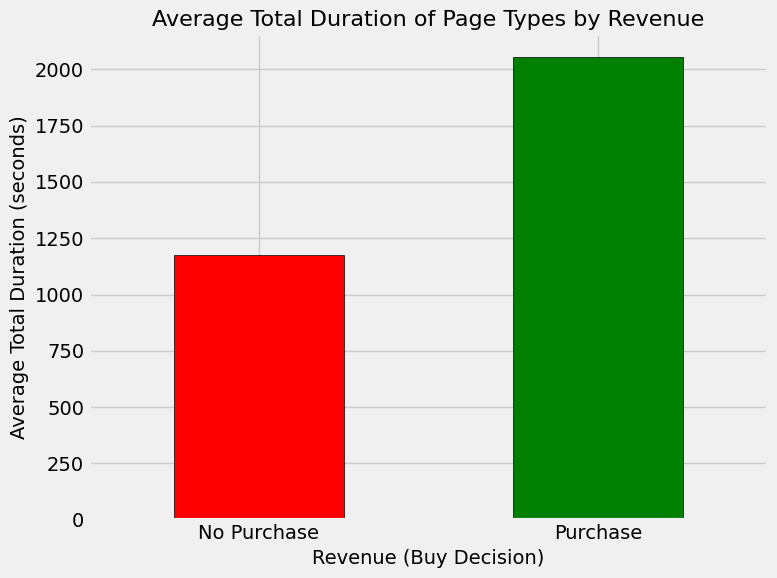

In [ ]:
# Visualize the Average Total Duration of Page Types by Revenue
# Make a copy of original dataset
df_copy = df.copy()

# Create a new feature
df_copy['Total_Duration'] = (
    df_copy['Administrative_Duration'] +
    df_copy['Informational_Duration'] +
    df_copy['ProductRelated_Duration']
)

# Grouping by Revenue and calculating the average total duration
duration_revenue_analysis = df_copy.groupby('Revenue')['Total_Duration'].mean()

# Plotting the analysis
plt.figure(figsize=(8, 6))
duration_revenue_analysis.plot(kind='bar', color=['red', 'green'], edgecolor='black')

# Adding labels and title
plt.title('Average Total Duration of Page Types by Revenue', fontsize=16)
plt.xlabel('Revenue (Buy Decision)', fontsize=14)
plt.ylabel('Average Total Duration (seconds)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Purchase', 'Purchase'], rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

- Users who spend more time in the platform are more likely to perform a transaction.
- Optimizing the content to keep user longer in the platform could further increase revenue.

### Correlation Matrix

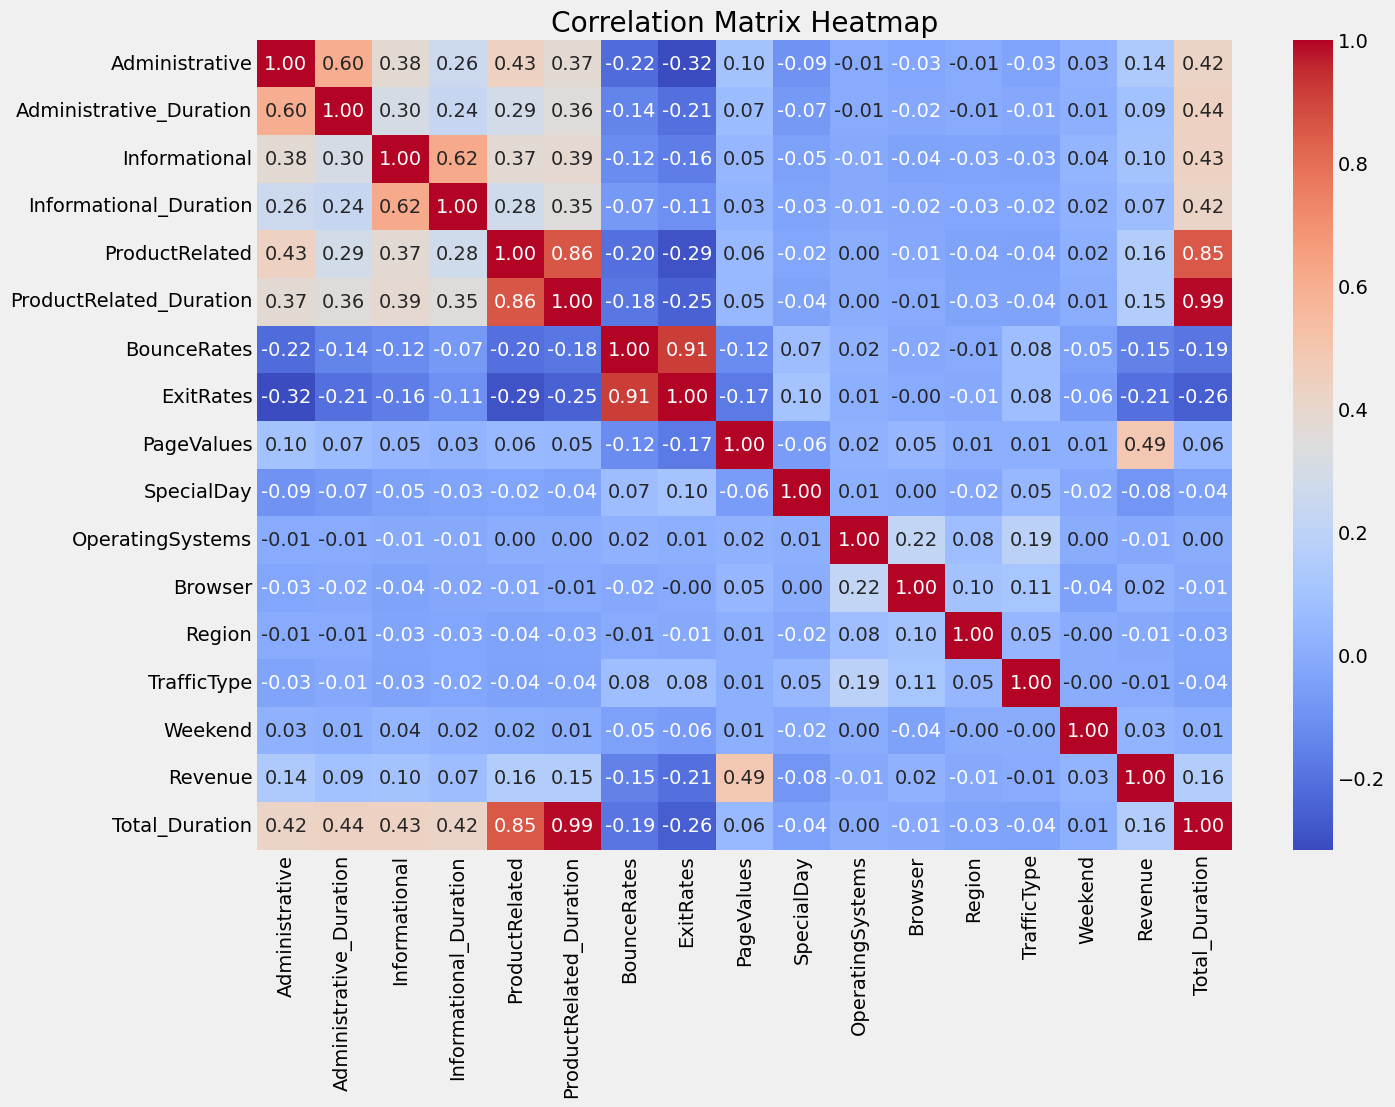

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_copy.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Insight about strong correlation with Revenue
- PageValues (0.49): is the strongest positive correlation with Revenue. Sessions that contain high page value are highly likely to create revenue.

- ProductRelated (0.16) & ProductRelated_Duration (0.15): The number of product-related pages browse and their usage time correlates positively with purchases. The more time user spend on these pages, the more opportunities of revenue creation.

- BounceRates (-0.15): Higher bounce rates minimized the likelihood of revenue generation. This is a typical pattern where engaged users (lower bounce rates) are more likely to make purchases.

- ExitRates (-0.10): Session with higher exit rates reduce the likelihood of revenue, result in brief sessions without any purchases.

#### Pairwise relationships:
- Administrative & Administrative_Duration (0.64), Informational & Infomational_Duration (0.30), ProductRelated & ProductRelated_Duration (0.98): The more page user visit, the more time user spend on them.
- BounceRates & ExitRates (0.91): Higher BounceRates (users leaving immediately) are correlate to higher ExitRates (users leaving from specific pages). Additionally, thay are highly interdependent because a "bounce" is a special type of "exit".
- TotalDuration & Exit Rates, TotalDuration & Bounce Rates: The negative correlation indicates that longer Total Duration reflects higher engagement of users, reducing both Exit Rates and Bounce Rates.


In [63]:
# Identify outliers with extreme BounceRates and ExitRates where Revenue is True
extreme_bounce_exit = df[(df['Revenue'] == True) & 
                           ((df['BounceRates'] > 0.1) | (df['ExitRates'] > 0.1))]

extreme_bounce_exit

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6433,1,0.0,0,0.0,11,113.80,0.083333,0.116667,0.0,0.0,Nov,2,4,1,3,Returning_Visitor,False,True
6700,0,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.0,Oct,2,5,1,20,Returning_Visitor,False,True
7600,0,0.0,0,0.0,3,0.00,0.200000,0.200000,0.0,0.0,Nov,3,2,1,11,Returning_Visitor,False,True
8106,2,256.5,0,0.0,10,117.25,0.110714,0.130952,0.0,0.0,Nov,2,2,7,11,Returning_Visitor,True,True
10531,0,0.0,0,0.0,8,335.25,0.100000,0.108333,0.0,0.0,Nov,3,12,1,1,Returning_Visitor,False,True
10789,1,0.0,0,0.0,1,0.00,0.200000,0.200000,0.0,0.0,Nov,3,2,3,8,Returning_Visitor,False,True
